<a href="https://colab.research.google.com/github/scarfboy/wetsuite-dev/blob/main/examples/Kamervragen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip --quiet install https://github.com/scarfboy/wetsuite-dev/archive/refs/heads/main.zip


     / 94 kB 718 kB/s
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 4.7 MB 16.5 MB/s 
     |████████████████████████████████| 1.1 MB 47.3 MB/s 
     |████████████████████████████████| 163 kB 16.6 MB/s 
     |████████████████████████████████| 6.6 MB 35.3 MB/s 


In [2]:
import wetsuite.datasets
kv = wetsuite.datasets.load('kamervragen')

Downloaded     71MiB  [==================================================]


Decompressing... 483MiB

  done.


In [4]:
print( kv.description )


    Questions from members of the parliament (at the moment only tweede kamer) to the government.

    Source: The KOOP SRU repositories,  specifically the ah-tk documents (aanhangsels, tweede kamer) within the officielepublicaties set.
    Restricted to documents that contain answers (ignoring documents that are only the questions, or only a note that they will be answered later)

    The structure of .data looks something like:
       {'ah-tk-20102011-2857': {
            'identifier': 'ah-tk-20102011-2857',
            'urls':   [ 'https://repository.overheid.nl/frbr/officielepublicaties/ah-tk/20102011/ah-tk-20102011-2857/1/metadata/metadata.xml',
                        'https://repository.overheid.nl/frbr/officielepublicaties/ah-tk/20102011/ah-tk-20102011-2857/1/xml/ah-tk-20102011-2857.xml',
                        ... 
                      ],
            'issued':       '2011-06-17',
            'available':    '2011-06-23',
            'vergaderjaar': '2010-2011',
            

# What do questions look like?

In [6]:
import textwrap, random

for kv_id, kv_details in random.sample( kv.data.items(), 2):  # pick two random documents
    print('\n=== %s ==='%kv_id)
    vraagdata = kv_details['vraagdata']
    for number in vraagdata:
          vraag    = vraagdata[number].get('vraag')    # note that these will be [plaintext, xmlfragment],  the [0] below picks up just the first
          antwoord = vraagdata[number].get('antwoord')
          if vraag and antwoord:  # one way to ignore lone vraag/antwoord  due to the mentioned grouping (the get() will fetch one to be None)
              print(  'Q%-5s  %s'%( number, '\n'.join(  textwrap.wrap(vraag[0],    subsequent_indent='        ')  ) )  ) 
              print(  'A%-5s  %s'%( number, '\n'.join(  textwrap.wrap(antwoord[0], subsequent_indent='        ')  ) )  )
              print()



=== ah-tk-20152016-815 ===
Q1      Wat is uw reactie op de uitspraak van de rechter te Arnhem dat in de
        jaren 2008, 2011 en 2012 in Nederland te hoge boeteverhogingen
        zijn doorgevoerd voor verkeersovertredingen?
A1      De kantonrechter komt in de onderhavige uitspraak tot het oordeel dat
        de boeteverhogingen in 2008, 2011 en 2012 te hoog zijn
        geweest. Hij overweegt hierbij dat niet inzichtelijk is
        gemaakt op welke manier er een verband is tussen de ernst van
        de gedraging en de verhoging van het boetebedrag, alsook dat
        artikel 2 Wet administratiefrechtelijke handhaving
        verkeersvoorschriften (Wahv) geen grondslag biedt voor de
        realisatie van een financiële taakstelling. Ik ben het niet
        eens met het oordeel dat er in 2008, 2011 en 2012 te hoge
        boeteverhogingen zijn doorgevoerd. Op grond van artikel 2 Wahv
        kunnen de boetebedragen bij AMvB worden gewijzigd. Artikel 2
        Wahv stelt enkel pro

# How many cases are there of grouped answers leading to mismatches in numbering?

``` 
note to self: structure looks like

'vraagdata':    {
                '1': {
                      'vraag':    ['Bent u bekend met de tv-uitzending, waarin o.a. de moeder van Lucas haar verhaal doet?', '<vraag> Bent ...']
                   'antwoord':    ['Ja.',  '<antwoord> Ja. ...']
                },
                
```

In [ ]:
mismatched_qa, matched_qa = 0,0

#for id, details in list(kv.data.items())[:200]:  # look at a small set
for id, details in list(kv.data.items()): # all
    vraagdata = details['vraagdata']

    vraag_numbers = set()
    antwoord_numbers = set()

    for qa_number in vraagdata:
        if 'vraag' in vraagdata[qa_number]:
            vraag_numbers.add( qa_number )
        if 'antwoord' in vraagdata[qa_number]:
            antwoord_numbers.add( qa_number )

        diff = vraag_numbers.symmetric_difference( antwoord_numbers )
        if len(diff) == 0:
            matched_qa    += 1
        else:
            mismatched_qa += 1
            if 0:  # showing all cases in the dataset would be very spammy
                print('\n=== %s ==='%id)
                print("Vragen:     %s"%sorted(vraag_numbers))
                print("Antwoorden: %s"%sorted(antwoord_numbers))
                print("Difference: %s"%sorted(diff))
                print( details['urls'][-1] )  # mention the document we used, so we can look at it

print( mismatched_qa, matched_qa )

12259 219302


# What does the metadata look like?

In [ ]:
import pandas   # pandas is a nice way to inspect and alter tabular data
df = pandas.DataFrame.from_dict( kv.data, orient='index' ) 
df['available_parsed'] = pandas.to_datetime( df['available'] )  # add a new colum that is the date string interpreted as a python datetime (used below)
df

,urls,indiener,ontvanger,vergaderjaar,available,issued,type,category,identifier,vraagdata,available_parsed
ah-tk-20212022-3272,[https://repository.overheid.nl/frbr/officiele...,"[D.G. Boswijk, L. Bromet]",[H. Staghouwer],2021-2022,2022-06-28,2022-06-27,"[officiële publicatie, Antwoord, Aanhangsel va...",Landbouw | Planten,ah-tk-20212022-3272,{'1': {'vraag': ['Bent u bekend met het artike...,2022-06-28
ah-tk-20212022-2046,[https://repository.overheid.nl/frbr/officiele...,[S.M. Beckerman],[H.M. de Jonge],2021-2022,2022-03-17,2022-03-14,"[officiële publicatie, Antwoord, Aanhangsel va...",Huisvesting | Organisatie en beleid,ah-tk-20212022-2046,{'1': {'vraag': ['Kent u het bericht inzake de...,2022-03-17
ah-tk-20202021-2878,[https://repository.overheid.nl/frbr/officiele...,[F.W. Futselaar],[C.J. Schouten],2020-2021,2021-05-28,2021-05-21,"[officiële publicatie, Antwoord, Aanhangsel va...",Natuur en milieu | Stoffen,ah-tk-20202021-2878,{'1': {'vraag': ['Bent u bekend met de bericht...,2021-05-28
ah-tk-20192020-121,[https://repository.overheid.nl/frbr/officiele...,[G.J. (Gijs) van Dijk],[T. van Ark],2019-2020,2019-10-01,2019-09-30,"[officiële publicatie, Antwoord, Aanhangsel va...",Financiën | Inkomensbeleid,ah-tk-20192020-121,{'1': {'vraag': ['Heeft u kennisgenomen van he...,2019-10-01
ah-tk-20182019-1855,[https://repository.overheid.nl/frbr/officiele...,[H. Nijboer],[W.B. Hoekstra],2018-2019,2019-03-15,2019-03-14,"[officiële publicatie, Antwoord, Aanhangsel va...",Financiën | Financieel toezicht,ah-tk-20182019-1855,{'1': {'vraag': ['Herinnert u zich nog uw antw...,2019-03-15
...,...,...,...,...,...,...,...,...,...,...,...
ah-tk-20212022-177,[https://repository.overheid.nl/frbr/officiele...,[S. Kerseboom],"[H.P.M. Knapen, Th.J.A.M. de Bruijn]",2021-2022,2021-10-07,2021-10-06,"[officiële publicatie, Antwoord, Aanhangsel va...",Internationaal | Internationale samenwerking,ah-tk-20212022-177,{'1': {'vraag': ['Wat betekenen de sterke aanw...,2021-10-07
ah-tk-20212022-3507,[https://repository.overheid.nl/frbr/officiele...,[P. van Houwelingen],[D. Yesilgöz-Zegerius],2021-2022,2022-07-13,2022-07-12,"[officiële publicatie, Antwoord, Aanhangsel va...",Internationaal | Internationale samenwerking,ah-tk-20212022-3507,{'1': {'vraag': ['Bent u bekend met het rappor...,2022-07-13
ah-tk-20212022-3508,[https://repository.overheid.nl/frbr/officiele...,"[H. Bontenbal, S.P.A. Erkens]",[R.A.A. Jetten],2021-2022,2022-07-13,2022-07-12,"[officiële publicatie, Antwoord, Aanhangsel va...",Natuur en milieu | Energie,ah-tk-20212022-3508,{'1': {'vraag': ['Klopt het dat de huidige reg...,2022-07-13
ah-tk-20212022-3496,[https://repository.overheid.nl/frbr/officiele...,[W.R. van Haga],[E. van der Burg],2021-2022,2022-07-13,2022-07-11,"[officiële publicatie, Antwoord, Aanhangsel va...",Migratie en integratie | Immigratie,ah-tk-20212022-3496,{'1': {'vraag': ['Bent u bekend met het berich...,2022-07-13


In [ ]:
df['category'].value_counts()

Zorg en gezondheid | Organisatie en beleid             2586
Openbare orde en veiligheid | Criminaliteit            1409
Internationaal | Organisatie en beleid                 1393
Openbare orde en veiligheid | Organisatie en beleid    1217
Recht | Staatsrecht                                     818
                                                       ... 
Migratie en integratie | Emigratie                       16
Recht | Bestuursrecht                                    15
Sociale zekerheid | Nabestaanden                         12
Economie | Toerisme                                      11
Werk | Levensloop                                         8
Name: category, Length: 111, dtype: int64

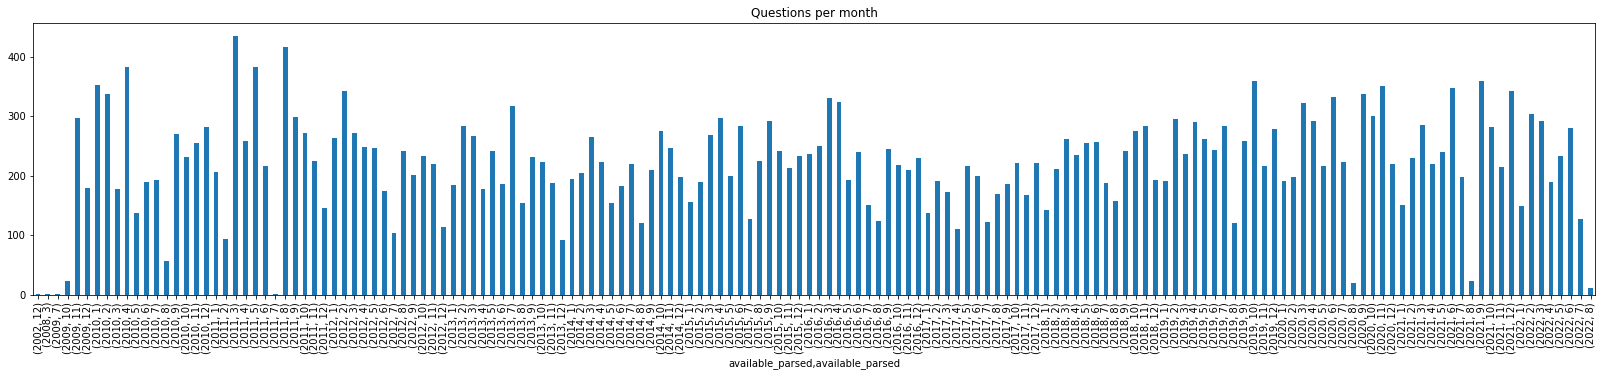

In [ ]:
# you could do a histogram over time something like:
#import matplotlib.pyplot, matplotlib.ticker
#fig, axis = matplotlib.pyplot.subplots()
#axis.hist(df['year'],  rwidth=0.8, bins=max(df['year'])-min(df['year']) )
#axis.xaxis.set_major_locator( matplotlib.ticker.MaxNLocator(integer=True) )
#axis.set_title('question sets per year')

# ...but pandas is quite succinct here. ...once you understand how it works, that is.
df['available_parsed'].groupby( [df["available_parsed"].dt.year,df["available_parsed"].dt.month] ).count().plot(kind="bar", figsize=(28,5), title='Questions per month')
